## 利用Tensorflow.keras构建二分类网络

In [1]:
# 导入 TensorFlow 和 TensorFlow Eager
import tensorflow as tf
from tensorflow import keras

# 导入函数来生成玩具分类问题
from sklearn.datasets import make_moons
import numpy as np

# 导入绘图库
import matplotlib.pyplot as plt
from sklearn import preprocessing

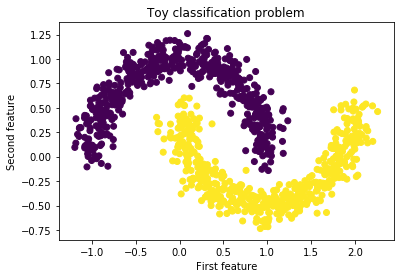

In [2]:
# 原始绘图
X, y = make_moons(n_samples=1000, noise=0.1, random_state=2018)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Toy classification problem')
plt.show()

In [3]:
def build_model():
    inputs = keras.Input(shape=(2,))
    x = keras.layers.Dense(50,activation='relu')(inputs)
    x = keras.layers.Dense(50,activation='relu')(x)
    prediction = keras.layers.Dense(1,activation='sigmoid')(x)
    model = keras.Model(inputs,prediction)
    model.summary()
    return model
    
def plot_history(history):
    """
    画出训练之后得到的结果
    """
    plt.figure()  
    plt.xlabel('Epoch')  
    plt.ylabel('Mean Loss')
    plt.plot(history.epoch, np.array(history.history['loss']),label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']), label = 'Val loss')
    plt.legend()

In [4]:
model = build_model()
model.compile(tf.train.RMSPropOptimizer(0.01), loss=tf.losses.mean_squared_error, metrics=['binary_accuracy'])
# 进行训练
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)  # 20代测试误差没有改进就退出
history = model.fit(X, y, batch_size=128, epochs=1000, validation_split=0.1, callbacks=[early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________
Train on 900 samples, validate on 100 samples
Epoch 1/1000
900/900 [==============================] - 0s 170us/step - loss: 0.2666 - binary_accuracy: 0.2200 - val_loss: 0.2638 - val_binary_accuracy: 0.2100
Epoch 2/1000
900/900 [==============================] - 0s 11us/st

900/900 [==============================] - 0s 10us/step - loss: 0.0023 - binary_accuracy: 0.9956 - val_loss: 0.0012 - val_binary_accuracy: 1.0000
Epoch 47/1000
900/900 [==============================] - 0s 10us/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 9.9931e-04 - val_binary_accuracy: 1.0000
Epoch 48/1000
900/900 [==============================] - 0s 13us/step - loss: 3.8561e-04 - binary_accuracy: 1.0000 - val_loss: 0.0018 - val_binary_accuracy: 1.0000
Epoch 49/1000
900/900 [==============================] - 0s 9us/step - loss: 0.0021 - binary_accuracy: 0.9978 - val_loss: 8.8303e-04 - val_binary_accuracy: 1.0000
Epoch 50/1000
900/900 [==============================] - 0s 9us/step - loss: 7.7479e-04 - binary_accuracy: 0.9989 - val_loss: 1.4706e-04 - val_binary_accuracy: 1.0000
Epoch 51/1000
900/900 [==============================] - 0s 11us/step - loss: 2.4596e-04 - binary_accuracy: 1.0000 - val_loss: 4.1664e-05 - val_binary_accuracy: 1.0000
Epoch 52/1000
900/900 [=====

900/900 [==============================] - 0s 13us/step - loss: 1.7324e-05 - binary_accuracy: 1.0000 - val_loss: 1.1298e-04 - val_binary_accuracy: 1.0000
Epoch 96/1000
900/900 [==============================] - 0s 9us/step - loss: 4.5359e-06 - binary_accuracy: 1.0000 - val_loss: 5.1699e-05 - val_binary_accuracy: 1.0000
Epoch 97/1000
900/900 [==============================] - 0s 10us/step - loss: 3.8629e-06 - binary_accuracy: 1.0000 - val_loss: 6.4335e-05 - val_binary_accuracy: 1.0000
Epoch 98/1000
900/900 [==============================] - 0s 9us/step - loss: 3.6653e-06 - binary_accuracy: 1.0000 - val_loss: 2.5218e-05 - val_binary_accuracy: 1.0000
Epoch 99/1000
900/900 [==============================] - 0s 8us/step - loss: 4.7078e-06 - binary_accuracy: 1.0000 - val_loss: 4.2967e-07 - val_binary_accuracy: 1.0000
Epoch 100/1000
900/900 [==============================] - 0s 14us/step - loss: 6.0499e-06 - binary_accuracy: 1.0000 - val_loss: 0.0168 - val_binary_accuracy: 0.9800
Epoch 101/10

Epoch 144/1000
900/900 [==============================] - 0s 8us/step - loss: 9.5638e-07 - binary_accuracy: 1.0000 - val_loss: 2.9821e-06 - val_binary_accuracy: 1.0000
Epoch 145/1000
900/900 [==============================] - 0s 10us/step - loss: 0.0011 - binary_accuracy: 0.9989 - val_loss: 9.1265e-08 - val_binary_accuracy: 1.0000
Epoch 146/1000
900/900 [==============================] - 0s 10us/step - loss: 1.2165e-04 - binary_accuracy: 1.0000 - val_loss: 2.3297e-05 - val_binary_accuracy: 1.0000
Epoch 147/1000
900/900 [==============================] - 0s 10us/step - loss: 3.1869e-04 - binary_accuracy: 1.0000 - val_loss: 0.0177 - val_binary_accuracy: 0.9800
Epoch 148/1000
900/900 [==============================] - 0s 12us/step - loss: 6.1625e-04 - binary_accuracy: 0.9989 - val_loss: 8.0139e-08 - val_binary_accuracy: 1.0000
Epoch 149/1000
900/900 [==============================] - 0s 9us/step - loss: 9.7476e-06 - binary_accuracy: 1.0000 - val_loss: 3.4285e-07 - val_binary_accuracy: 1.0

900/900 [==============================] - 0s 10us/step - loss: 1.3737e-07 - binary_accuracy: 1.0000 - val_loss: 9.6017e-06 - val_binary_accuracy: 1.0000
Epoch 193/1000
900/900 [==============================] - 0s 9us/step - loss: 4.2489e-06 - binary_accuracy: 1.0000 - val_loss: 6.9932e-07 - val_binary_accuracy: 1.0000
Epoch 194/1000
900/900 [==============================] - 0s 8us/step - loss: 3.5677e-06 - binary_accuracy: 1.0000 - val_loss: 1.2335e-05 - val_binary_accuracy: 1.0000
Epoch 195/1000
900/900 [==============================] - 0s 8us/step - loss: 4.4081e-07 - binary_accuracy: 1.0000 - val_loss: 1.3360e-05 - val_binary_accuracy: 1.0000
Epoch 196/1000
900/900 [==============================] - 0s 12us/step - loss: 4.1000e-07 - binary_accuracy: 1.0000 - val_loss: 4.5332e-04 - val_binary_accuracy: 1.0000
Epoch 197/1000
900/900 [==============================] - 0s 12us/step - loss: 0.0019 - binary_accuracy: 0.9978 - val_loss: 0.0038 - val_binary_accuracy: 0.9900
Epoch 198/10

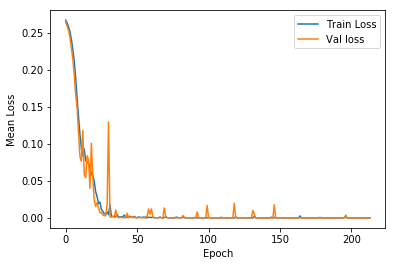

In [5]:
plot_history(history)

In [6]:
# 获取输出y
biner = preprocessing.Binarizer(threshold=0.5)
y_pred = biner.transform(model.predict(X))

## 构建边界图

Text(0.5, 1.0, 'Toy classification problem')

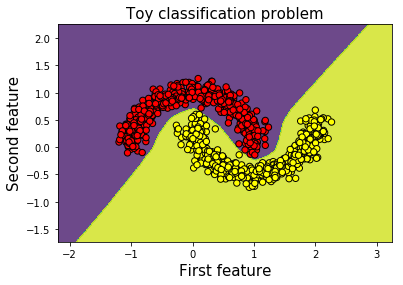

In [7]:
# 创建 mesh ，在其中绘制
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# 为每个样本 xx, yy 预测标签
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = biner.transform(Z)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
# 绘制我们的训练样本
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.autumn, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('First feature', fontsize=15)
plt.ylabel('Second feature', fontsize=15)
plt.title('Toy classification problem', fontsize=15)